In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hopfiled import HopfieldNet
from hopfiled import preprocesar
from PIL import Image


from IPython.display import clear_output


In [2]:
def diferencia(patron1, patron2):
    return np.sum((patron1 != patron2))

def generar_patron(shape):
    return np.random.choice([1, -1], size=shape)

def test_hopfield(shape, N):
    patron1 = generar_patron(shape)
    patrones = [patron1]
    dife = []
    memoria = np.arange(2, N+2)
    for _ in range(N):
        patron = generar_patron(shape)
        hopfield = HopfieldNet(shape)
        patrones.append(patron)
        hopfield.train(patrones)
        state = hopfield.update(patrones[0], int(10*shape[0]*shape[1])).reshape(shape)
        diff = diferencia(patron1, state)
        dife.append(diff)
    return dife


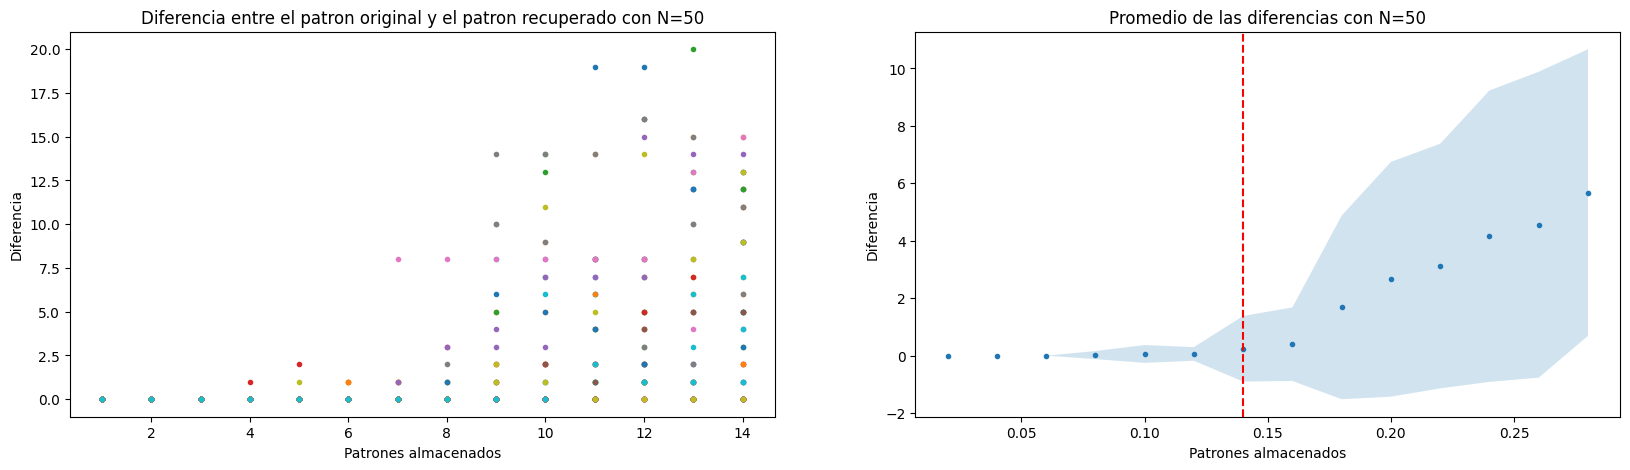

In [14]:
shape = (50, 1)
error = []
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title(f'Diferencia entre el patron original y el patron recuperado con N={shape[0]*shape[1]}')
plt.ylabel('Diferencia')
plt.xlabel('Patrones almacenados/Tamaño de la red')
x = np.arange(1,int(shape[0]*shape[1]*0.3))
for _ in range(50):
    diff = test_hopfield(shape, x[-1])
    error.append(diff)
    plt.plot(x,diff,'.')

plt.subplot(1, 2, 2)
plt.title(f'Promedio de las diferencias con N={shape[0]*shape[1]}')
plt.ylabel('Diferencia')
plt.xlabel('Patrones almacenados/Tamaño de la red')
plt.plot(x/(shape[0]*shape[1]), np.mean(error, axis=0),'.')
# Ahora voy a añadir una banda de color de anchura la desviación estandar
plt.fill_between(x/(shape[0]*shape[1]), np.mean(error, axis=0)-np.std(error, axis=0), np.mean(error, axis=0)+np.std(error, axis=0), alpha=0.2)
# y una barra vertical en el punto donde se encuentra el cambio de comportamiento
plt.axvline(x=0.14, color='red', linestyle='--')
plt.show()

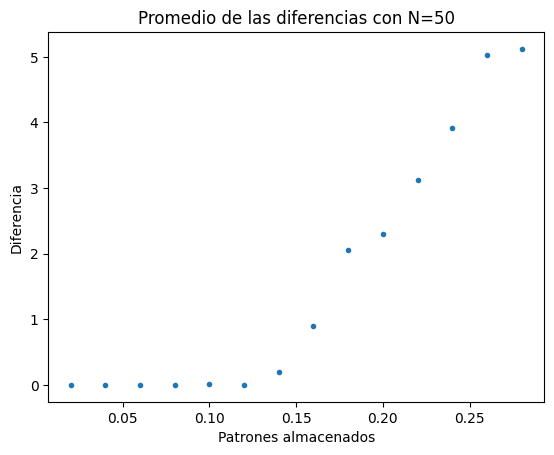

In [4]:

plt.title(f'Promedio de las diferencias con N={shape[0]*shape[1]}')
plt.ylabel('Diferencia')
plt.xlabel('Patrones almacenados/Tamaño de la red')
plt.plot(x/(shape[0]*shape[1]), np.mean(error, axis=0),'.')
plt.show()

In [15]:
def plot_test(shape, N=int(shape[0]*shape[1]/2)):
    shape = shape
    error = []
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Diferencia entre el patron original y el patron recuperado con I={shape[0]*shape[1]}')
    plt.ylabel('Diferencia')
    plt.xlabel('Patrones almacenados/Tamaño de la red')
    x = np.arange(1,int(shape[0]*shape[1]*0.3))
    for _ in range(N):
        diff = test_hopfield(shape, x[-1])
        error.append(diff)
        plt.plot(x,diff,'.')

    plt.subplot(1, 2, 2)
    plt.title(f'Promedio de las diferencias con I={shape[0]*shape[1]}')
    plt.ylabel('Diferencia')
    plt.xlabel('Patrones almacenados/Tamaño de la red')
    plt.plot(x/(shape[0]*shape[1]), np.mean(error, axis=0),'.')
    # Ahora voy a añadir una banda de color de anchura la desviación estandar
    plt.fill_between(x/(shape[0]*shape[1]), np.mean(error, axis=0)-np.std(error, axis=0), np.mean(error, axis=0)+np.std(error, axis=0), alpha=0.2)
    # y una barra vertical en el punto donde se encuentra el cambio de comportamiento
    plt.axvline(x=0.14, color='red', linestyle='--')
    plt.show()
    return x/(shape[0]*shape[1]) ,error

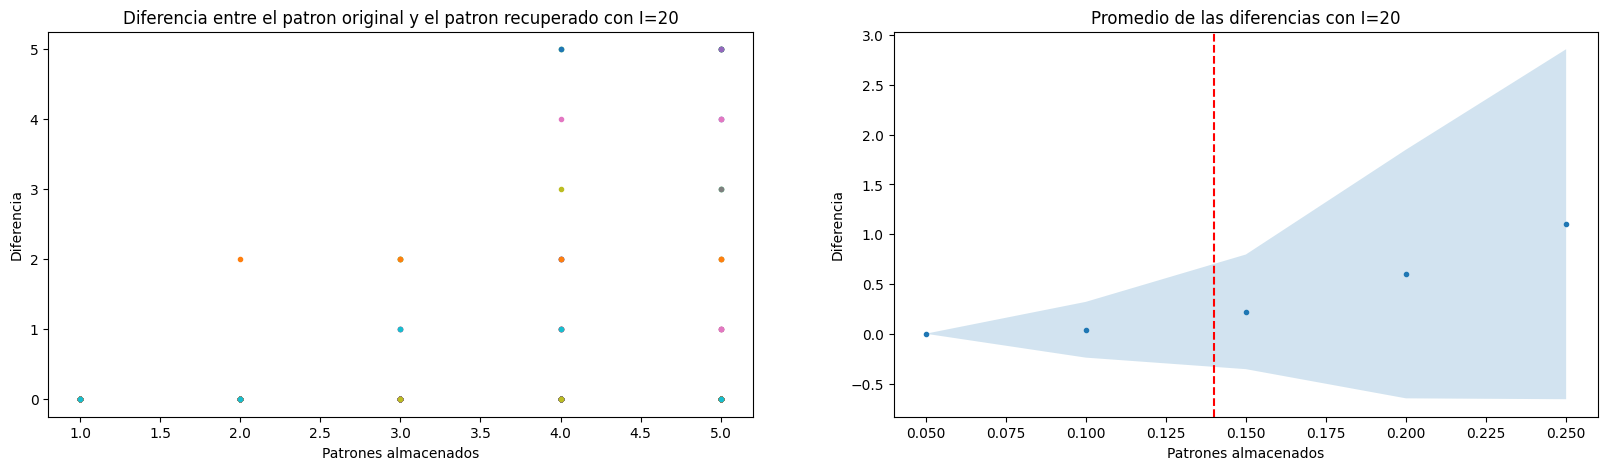

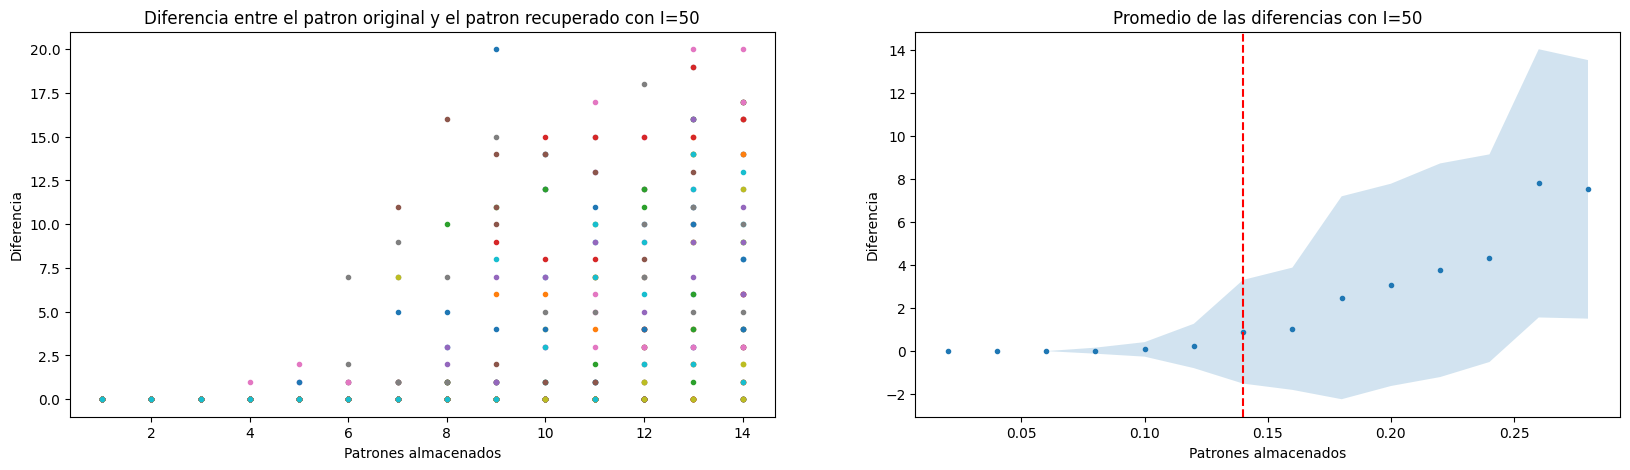

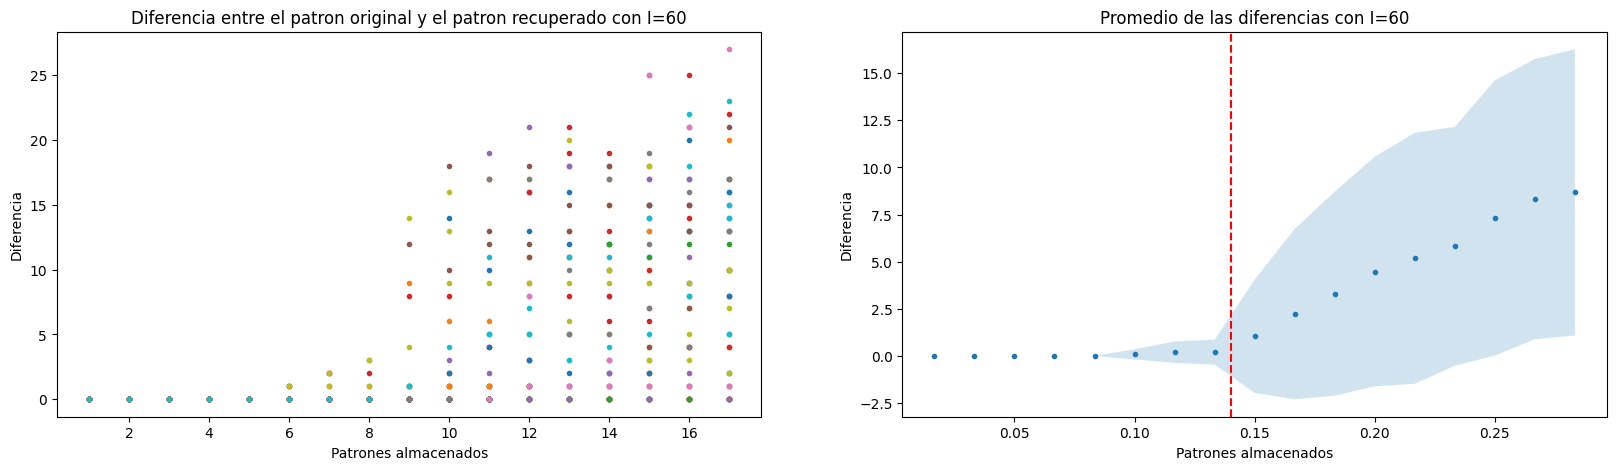

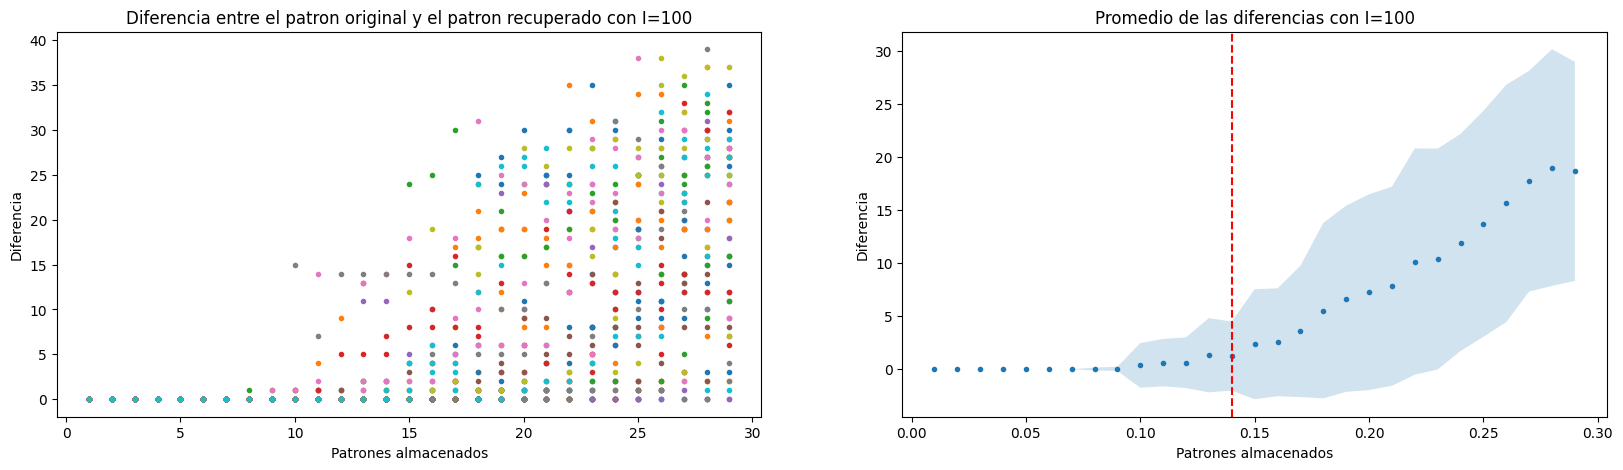

In [17]:
I = [20,50,60,100]
d_fases = []
x_fases = []
for i in I:
    x, error = plot_test((i, 1), N=50)
    d_fases.append(error)
    x_fases.append(x)

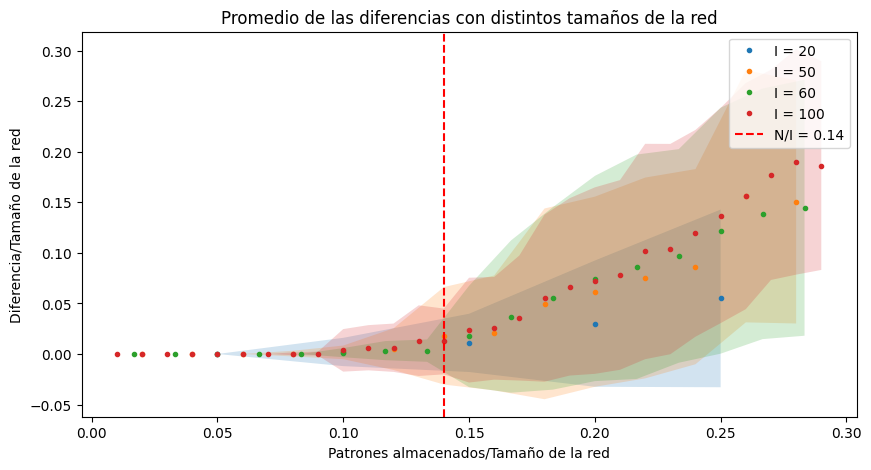

In [40]:
plt.figure(figsize=(10, 5))
for x, d, i in zip(x_fases, d_fases, I):
    plt.plot(x, np.mean(d, axis=0)/i,'.', label = f'I = {i}')
    # banda de error
    plt.fill_between(x, (np.mean(d, axis=0)-np.std(d, axis=0))/i, (np.mean(d, axis=0)+np.std(d, axis=0))/i, alpha=0.2)
# barra vertical
plt.axvline(x=0.14, color='red', linestyle='--', label = 'N/I = 0.14')

plt.title(f'Promedio de las diferencias con distintos tamaños de la red')
plt.ylabel('Diferencia/Tamaño de la red')
plt.xlabel('Patrones almacenados/Tamaño de la red')
plt.legend()
plt.show()

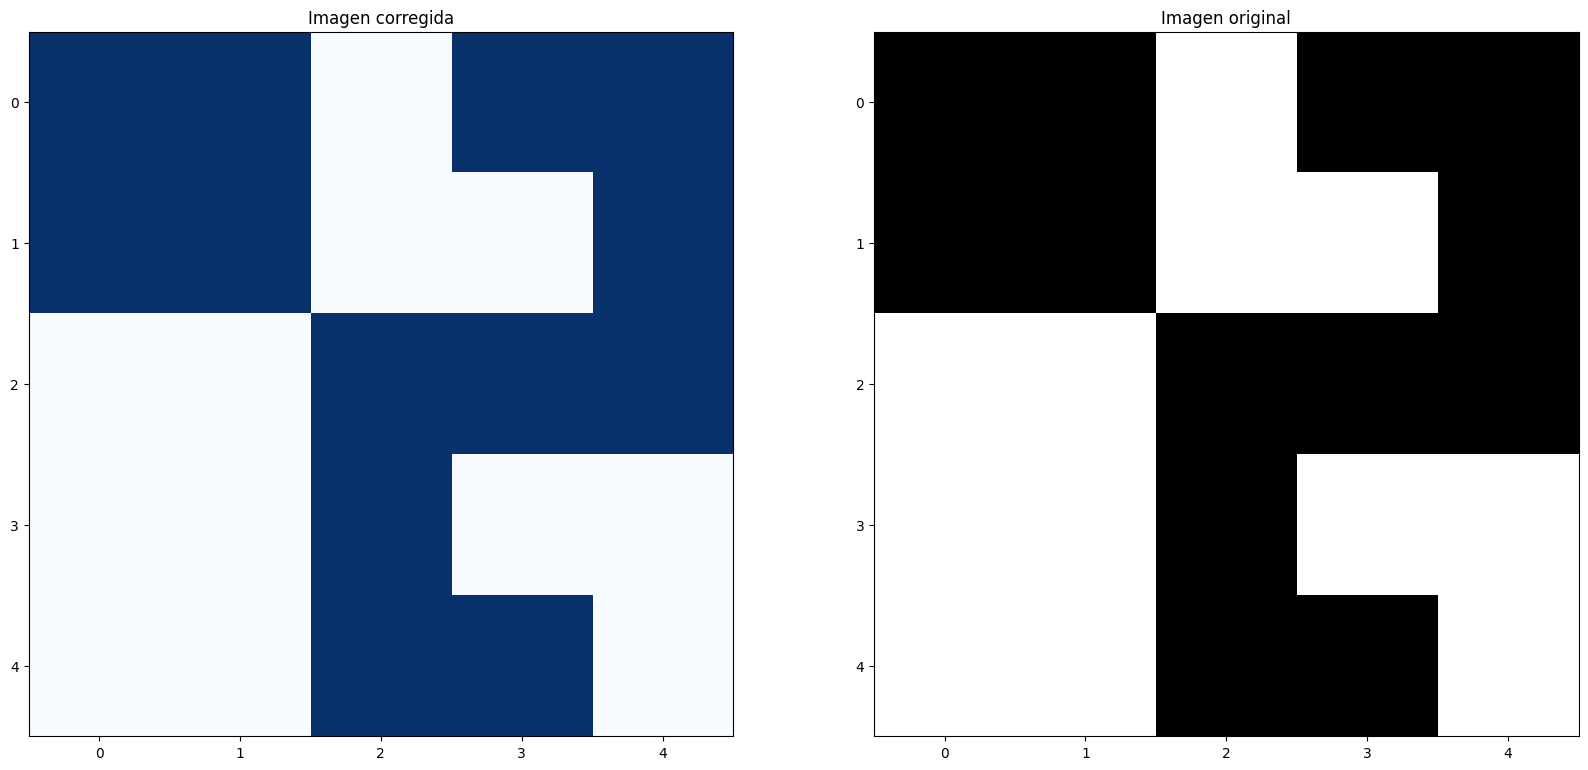

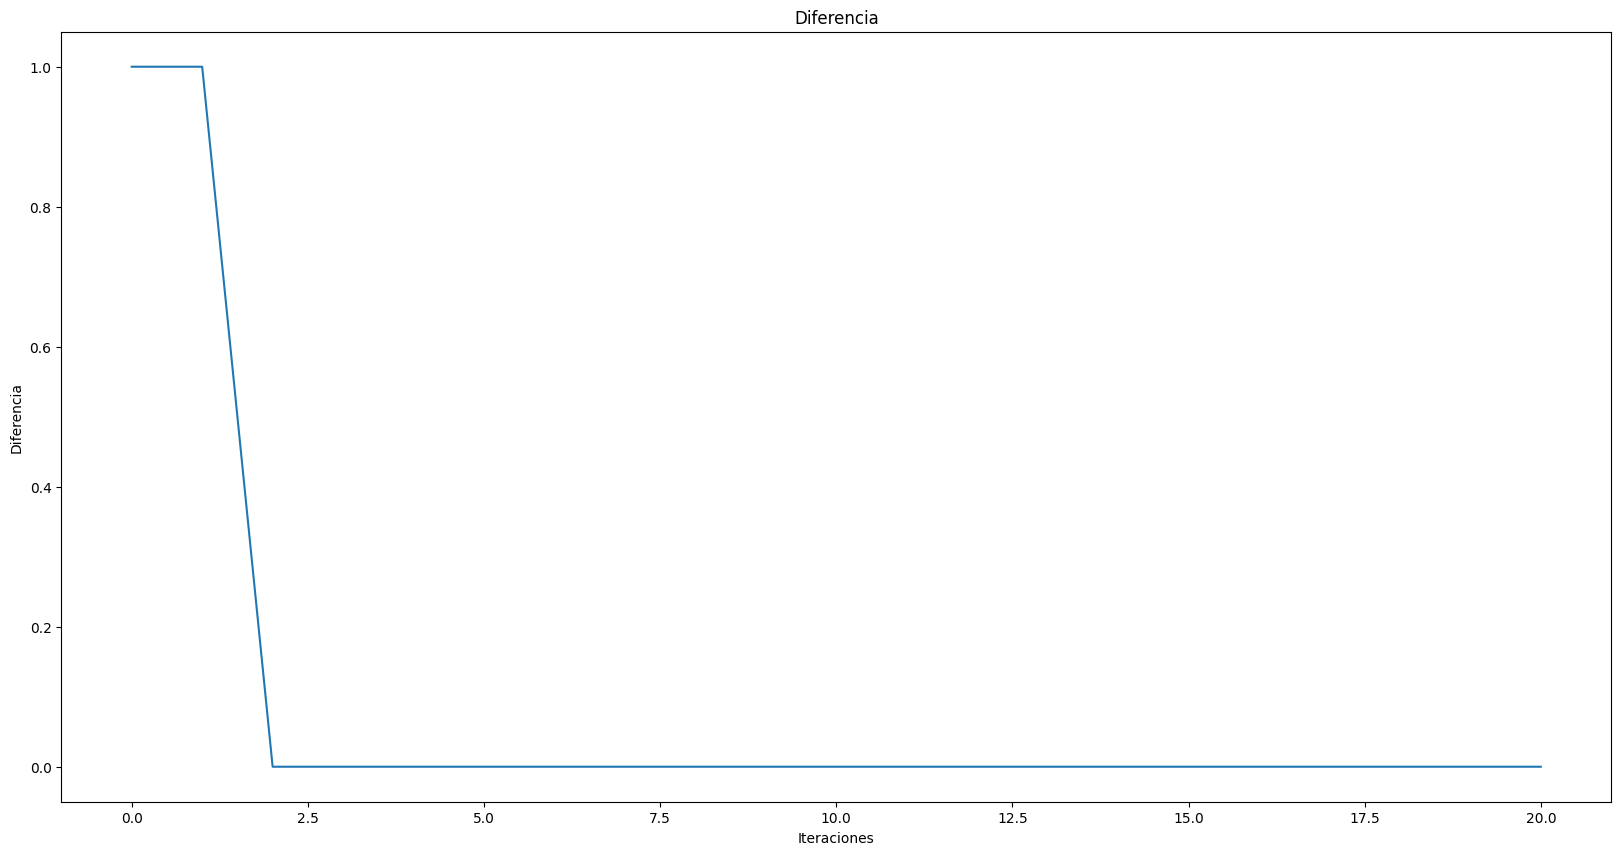

In [9]:
# Vemos gráficamente la diferencia entre el patron original y el patron recuperado
patrones = []
shape = (5,5)
for i in range(3):
    patron = np.random.choice([1, -1], size=shape)
    patrones.append(patron)
net = HopfieldNet(shape)
net.train(patrones)
# Generar coordenadas aleatorias
i, j = np.random.randint(0, shape[0], size=2)
# Cambiar el valor en las coordenadas generadas
state = patrones[-1].copy()
state[i, j] = -1 if patrones[-1][i, j] == 1 else 1

diff = [diferencia(patrones[-1], state)]

for i in range(20):
    state = net.update(state, steps = 10).reshape(patrones[-1].shape)
    diff.append(diferencia(patrones[-1], state))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(state, cmap='Blues_r')
    plt.imshow(patrones[-1], cmap='gray', alpha=0.9)
    plt.title(f'Imagen corregida \n err={np.round(diff[-1], 4)}')
    plt.subplot(1, 2, 2)
    plt.plot(diff)
    plt.xlabel('Iteraciones')
    plt.ylabel('Diferencia') 
    plt.title('Diferencia')
    plt.show()
    clear_output(wait=True)
# Mostramos la imagen corregida
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plt.imshow(patrones[-1], cmap='gray')
plt.title('Imagen original')
plt.subplot(1, 2, 1)
plt.imshow(state, cmap='Blues_r')
plt.title('Imagen corregida')
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(diff)
plt.xlabel('Iteraciones')
plt.ylabel('Diferencia')

plt.title('Diferencia')
plt.show()

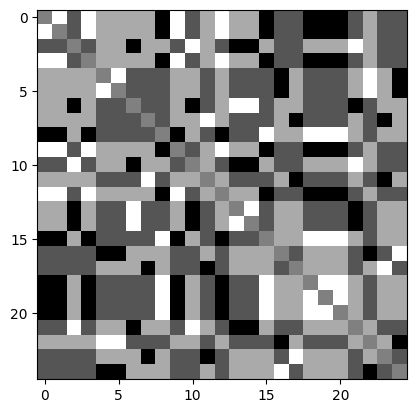

In [39]:
plt.imshow(net.weights, cmap='gray')
plt.show()